In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline

In [8]:
matplotlib.__version__

'3.9.2'

In [10]:
plt.ion()
plt.isinteractive()

True

In [11]:
tips = pd.read_csv("tips.csv")

In [12]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
day_total = tips.groupby('day', as_index=False)['total_bill'].sum()
day_total

,day,total_bill
0,Fri,325.88
1,Sat,1778.40
2,Sun,1627.16
3,Thur,1096.33


## Line Graph

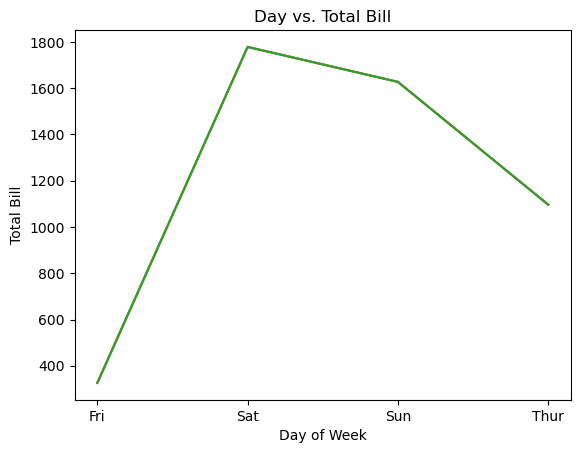

In [16]:
plt.xlabel("Day of Week")
plt.ylabel("Total Bill")
p = plt.title("Day vs. Total Bill")
plt.plot(day_total['day'], day_total['total_bill'])  # Line Graph
plt.show()

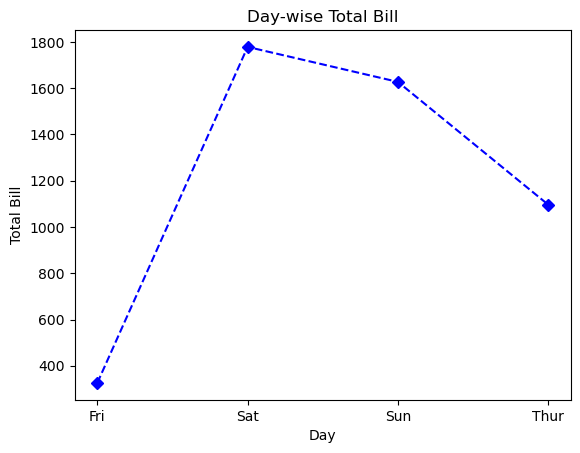

In [19]:
plt.title("Day-wise Total Bill")
plt.xlabel("Day")
plt.ylabel("Total Bill")
#plt.plot(day_total['day'], day_total['total_bill'], color='red', linestyle='dashed',  linewidth=4)
plt.plot(day_total['day'], day_total['total_bill'],'bD--')  # color(b) Marker(D) LineStyle(--)
plt.show()

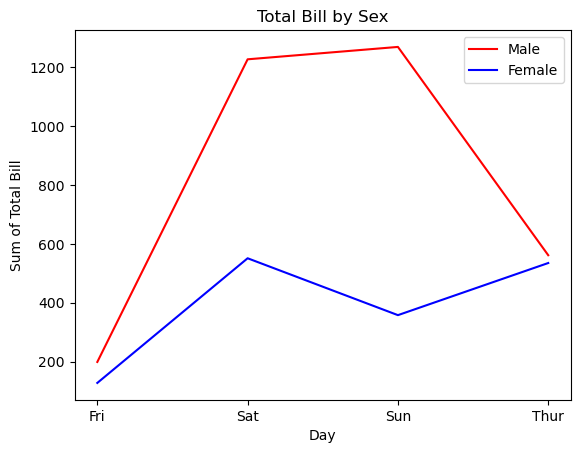

In [20]:
male = tips[ tips.sex == 'Male']
maletotal = male.groupby('day', as_index = False)['total_bill'].sum()

female = tips[ tips.sex == 'Female']
femaletotal = female.groupby('day', as_index = False)['total_bill'].sum()

plt.plot(maletotal['day'], maletotal['total_bill'],color='red', label="Male")
plt.plot(femaletotal['day'], femaletotal['total_bill'],color='blue', label="Female")
plt.legend()
#plt.legend(loc='upper right')
plt.xlabel("Day")
plt.ylabel("Sum of Total Bill")
v = plt.title("Total Bill by Sex")
#plt.ylim(0,1500)  # Change Y-Axis scale 
plt.show()

## Bar Graph

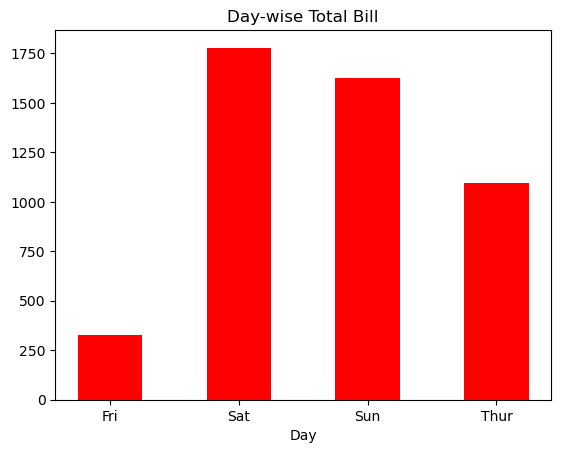

In [21]:
#plt.bar(day_total['day'], day_total['total_bill'])
plt.bar(day_total['day'], day_total['total_bill'], color='red', width=0.5)
#plt.yticks(np.arange(0,2000,step=200)) 
plt.title("Day-wise Total Bill")
plt.xlabel("Day")
plt.show()

## Pie chart

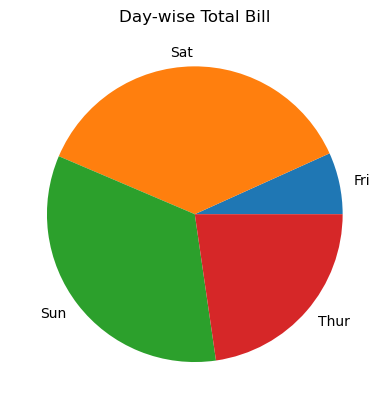

In [22]:
plt.title("Day-wise Total Bill")
plt.pie(day_total['total_bill'], labels = day_total['day'])
plt.show()

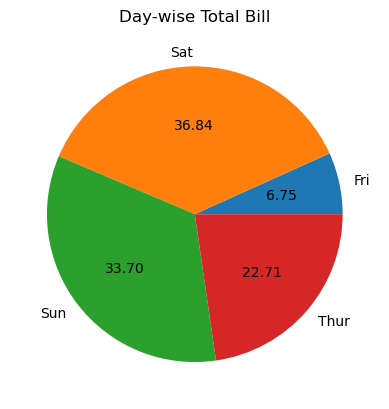

In [23]:
plt.pie(day_total['total_bill'], labels = day_total['day'], autopct ="%.2f")
t = plt.title("Day-wise Total Bill")
plt.show()

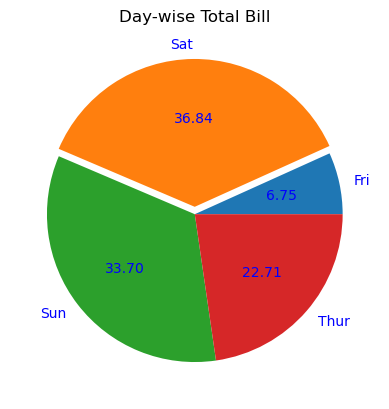

In [24]:
ax = plt.pie(day_total['total_bill'], labels = day_total['day'], autopct ="%.2f",
              explode = (0,0.05,0,0),
              textprops = {'color' : 'blue'},
              wedgeprops = {'linewidth' : 10})
t = plt.title("Day-wise Total Bill")
plt.show()

## Scatter Plot

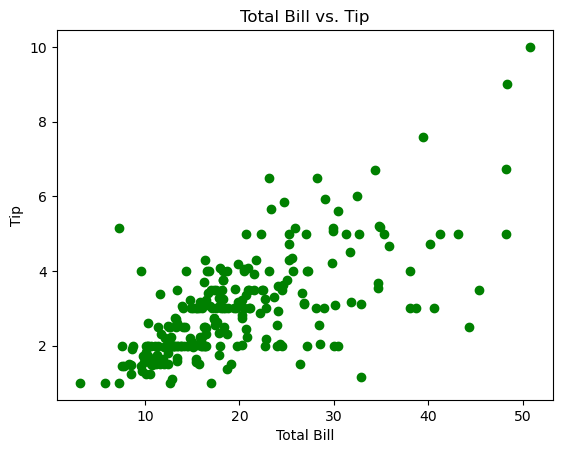

In [25]:
plt.scatter(tips['total_bill'], tips['tip'],c = 'green')
plt.title("Total Bill vs. Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
#plt.gcf().set_size_inches(15,5)
plt.show()

In [27]:
male_trans = tips.loc [ tips.sex == 'Male',:]
female_trans = tips.loc [ tips.sex == 'Female',:]

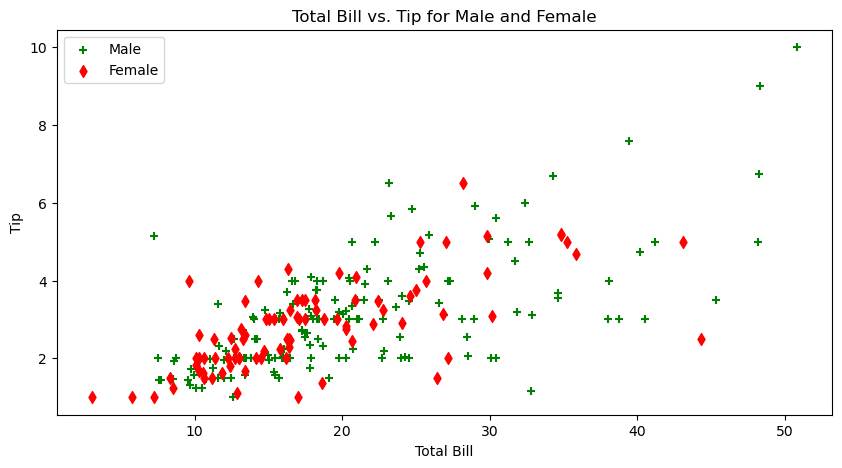

In [28]:
plt.scatter(male_trans['total_bill'], male_trans['tip'], c = 'green', marker='+', label='Male')
plt.scatter(female_trans['total_bill'], female_trans['tip'], c = 'red', marker= 'd', label='Female')
plt.title("Total Bill vs. Tip for Male and Female")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.legend()
plt.gcf().set_size_inches(10,5)
plt.show()

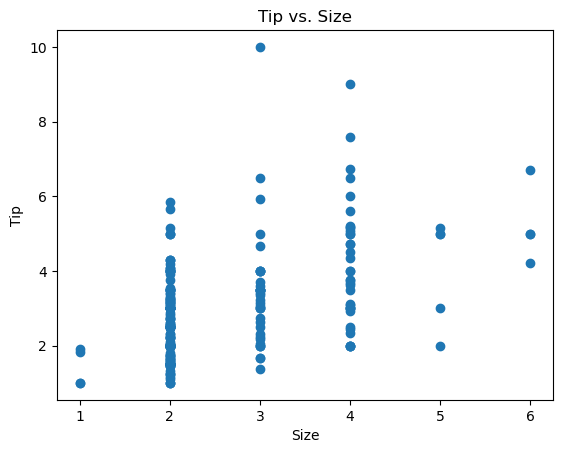

In [29]:
plt.scatter(tips['size'], tips['tip'])
plt.title("Tip vs. Size")
plt.xlabel("Size")
plt.ylabel("Tip")
plt.show()

## Box Plot

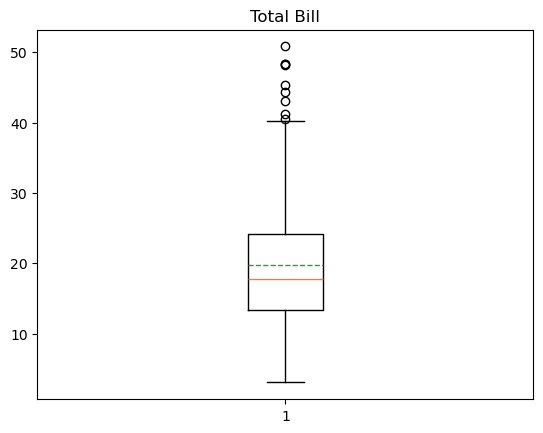

In [32]:
plt.boxplot(tips['total_bill'],showmeans=True, meanline=True)
plt.title("Total Bill")
plt.show()

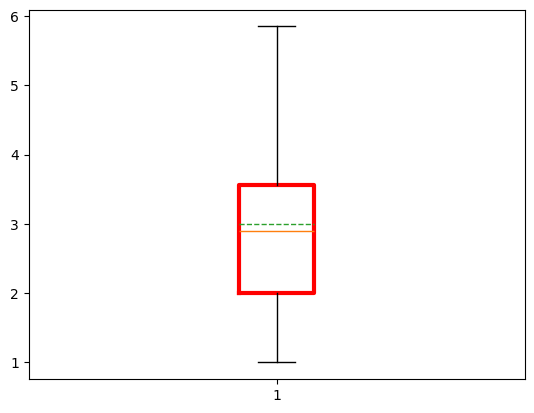

In [33]:
prop = {'color':'red', 'linewidth' : 3, 'linestyle' : 'solid'}  # Proerties of box 
ax = plt.boxplot(tips['tip'], showfliers=False, showmeans=True, meanline=True, boxprops=prop)
plt.show()

## Histogram

In [22]:
plt.title("Total Bill Distribution")
plt.xlabel("Total Bill")
plt.ylabel("Count")
ax = plt.hist(tips['total_bill'])

In [23]:
plt.title("Tip Distribution")
plt.xlabel("Tip")
plt.ylabel("Count")
ax = plt.hist(tips['tip'])

In [24]:
edges = range(0,60,10)
print(list(edges))
plt.hist(tips['total_bill'], bins=edges)
plt.title("Total Bill")

[0, 10, 20, 30, 40, 50]


Text(0.5, 1.0, 'Total Bill')

In [25]:
plt.hist(tips['total_bill'], bins=5, orientation='horizontal')
plt.title("Total Bill")

Text(0.5, 1.0, 'Total Bill')

## Object API

In [26]:
ax = plt.subplot()
print(type(ax))
ax.bar(day_total['day'], day_total['total_bill'])
ax.set_title("Day-wise Total Bill")
ax.set_xlabel("Day")
ax.set_ylabel("Total Bill")

<class 'matplotlib.axes._axes.Axes'>


Text(314.44444444444446, 0.5, 'Total Bill')

In [27]:
fig,ax = plt.subplots(2,1) # 2 row, 1 columns 
fig.suptitle('Day-wise Total', fontsize=14, color='blue')
fig.set_size_inches(15,10)
# First Axes - Bar Graph
ax[0].bar(day_total['day'], day_total['total_bill'], color='red')
ax[0].set_xlabel("Day")
ax[0].set_ylabel("Total Bill")
# Second Axes - Line Graph
ax[1].plot(day_total['day'], day_total['total_bill'], linewidth=4)
ax[1].set_xlabel("Day")
ax[1].set_ylabel("Total Bill")
fig.savefig("day_total.jpg")

### Text 

In [28]:
plt.plot(day_total['day'], day_total['total_bill'])
# set labels for markers
days = day_total['day']
totals = day_total['total_bill']
for (x,y) in zip(days,totals):
    plt.text(x,y + 10,f"{y:.0f}", fontdict= {'color': 'red','family' : 'calibri', 'size': 12})

plt.text("Fri",1000,'Friday 1000')    

Text(Fri, 1000, 'Friday 1000')

In [29]:
import requests 
import warnings

warnings.filterwarnings('ignore')
countries_dict = requests.get("https://restcountries.com/v2/all",verify=False).json()
countries = pd.DataFrame(countries_dict)

# Take only top 5 countries by population
tc = countries.nlargest(5,'population')
plt.scatter(x = tc ['area'], y = tc ['population'])
plt.gcf().set_size_inches (8,5) # gcf () get current figure and change its size     
plt.xlabel("Area")
plt.ylabel("Population")

# set labels for dots
for i in tc.index:
     population_in_cr = tc.loc[i,'population'] // 10000000
     plt.text(tc.loc[i,'area'] + 100000, tc.loc[i,'population'], f"{tc.loc[i,'alpha3Code']}-{population_in_cr} CR")   

In [30]:
# smoker_total  = pd.crosstab(tips['day'], tips['smoker'], tips['total_bill'], aggfunc=sum)
smoker_total  = tips.pivot_table(index='day', columns='smoker',values= 'total_bill',aggfunc=sum)

In [31]:
smoker_total

smoker,No,Yes
day,,
Fri,73.68,252.20
Sat,884.78,893.62
Sun,1168.88,458.28
Thur,770.09,326.24


### Stacked bar

In [32]:
ax = plt.subplot()
ax.bar(smoker_total.index , height=smoker_total['Yes'], label="Smokers", color='red')
ax.bar(smoker_total.index , height=smoker_total['No'], bottom = smoker_total["Yes"],  label="Non Smokers")
ax.legend()

In [33]:
smoker_total.plot.bar(stacked=True)

<Axes: xlabel='day'>

In [34]:
smoker_total

smoker,No,Yes
day,,
Fri,73.68,252.20
Sat,884.78,893.62
Sun,1168.88,458.28
Thur,770.09,326.24


In [35]:
ax = smoker_total.plot.bar()
ax.set_ylabel('Total Bill')
t = ax.set_title('Total Bill Per Day for Smokers vs. Non-Smokers')

In [36]:
day_total= tips.pivot_table(index='sex', columns='day',values= 'total_bill',aggfunc=sum)
day_total

day,Fri,Sat,Sun,Thur
sex,,,,
Female,127.31,551.05,357.70,534.89
Male,198.57,1227.35,1269.46,561.44


In [37]:
day_total.plot.bar(stacked=True)

<Axes: xlabel='sex'>

In [38]:
day_total.plot.bar()

<Axes: xlabel='sex'>

In [39]:
smoker_total.plot.line()

<Axes: xlabel='day'>

In [40]:
ax = smoker_total.plot.line(subplots=True)

In [41]:
totals  = pd.crosstab(tips['sex'],tips['day' ], tips['total_bill'], aggfunc=sum)

In [42]:
totals

day,Fri,Sat,Sun,Thur
sex,,,,
Female,127.31,551.05,357.70,534.89
Male,198.57,1227.35,1269.46,561.44


In [43]:
totals.plot(kind='barh', figsize=(10,5))

<Axes: ylabel='sex'>

### Histogram

In [44]:
ax = tips.hist()
print(ax)
ax[1,0].set_title("Table Size")

[[<Axes: title={'center': 'total_bill'}> <Axes: title={'center': 'tip'}>]
 [<Axes: title={'center': 'size'}> <Axes: >]]


Text(0.5, 1.0, 'Table Size')

In [45]:
ax = tips[['total_bill','tip']].hist()

In [46]:
asia_top_10 = countries.loc[countries.region == 'Asia', ['name', 'population','area']].sort_values('population',ascending=False).head(10)

In [47]:
asia_top_10

,name,population,area
48,China,1402112000,9640011.0
104,India,1380004385,3287590.0
105,Indonesia,273523621,1904569.0
169,Pakistan,220892331,881912.0
18,Bangladesh,164689383,147570.0
114,Japan,125836021,377930.0
176,Philippines,109581085,342353.0
244,Vietnam,97338583,331212.0
231,Turkey,84339067,783562.0
107,Iran (Islamic Republic of),83992953,1648195.0


In [48]:
fig,(ax1,ax2) = plt.subplots(2,1)  # 2 rows by 1 col 
fig.set_size_inches(15,15)
ax1.bar(asia_top_10['name'],asia_top_10['population'])
t = ax1.set_xticklabels(asia_top_10.name, rotation = 'vertical')
ax2.bar(asia_top_10['name'],asia_top_10['area'])
x = ax2.set_xticklabels(asia_top_10.name, rotation = 80)